In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime , date
import plotly.express as px

In [3]:
excel_file=pd.ExcelFile('Raw_data.xlsx')
excel_file.sheet_names

['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']

In [4]:
my_data=pd.read_excel(r"C:\Users\A80843\OneDrive - Arrow Electronics, Inc\Documents\Local_Disk_D\PythonProjects\Test\Raw_data.xlsx",sheet_name=0)

In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [6]:
my_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
my_data.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,2875.201110


In [8]:
my_data.online_order.value_counts()

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64

In [9]:
my_data['online_order'].isna().sum()

360

In [10]:
my_data['online_order'].mode()[0]

1.0

In [11]:
my_data['online_order'].fillna(my_data['online_order'].mode()[0],inplace=True)

In [12]:
my_data.online_order.isna().sum()

0

In [13]:
my_data.describe(include='all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,20000.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,NaN,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.509450,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,2091.470000,1759.850000,42710.000000


In [14]:
my_data.dropna(inplace=True)

In [15]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 non-nu

In [16]:
my_data.to_csv('transaction_data.csv',index=False)

In [17]:
my_data2=pd.read_excel('Raw_data.xlsx',sheet_name='CustomerDemographic')

In [18]:
my_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [19]:
my_data2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [20]:
my_data2.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [21]:
my_data2.dropna(subset='DOB',inplace=True)

In [22]:
my_data2.describe(include='all')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
count,3913.000000,3913,3792,3913,3913.000000,3913,3416,3257,3913,3913,3698.0,3913,3913.000000
unique,NaN,3079,3647,6,NaN,3448,195,9,3,2,90.0,2,NaN
top,NaN,Tobe,Ramsdell,Female,NaN,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100.0,Yes,NaN
freq,NaN,5,3,2037,NaN,7,43,796,1954,3911,113.0,1974,NaN
mean,1999.325837,NaN,NaN,NaN,49.041912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.657041
std,1155.183301,NaN,NaN,NaN,28.764990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.660146
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,1002.000000,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
50%,1999.000000,NaN,NaN,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
75%,2997.000000,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000


In [23]:
my_data2.isna().sum()

customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                215
owns_car                                 0
tenure                                   0
dtype: int64

In [24]:
my_data2['last_name'].fillna('Unkown',inplace=True)

In [25]:
my_data2['job_title'].fillna('Unkown',inplace=True)
my_data2['job_industry_category'].fillna('Unkown',inplace=True)

In [26]:
my_data2.isna().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                215
owns_car                                 0
tenure                                   0
dtype: int64

In [27]:
my_data2.drop(columns='default',inplace=True)

In [28]:
my_data2.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [29]:
my_data2.duplicated().sum()

0

In [30]:
my_data2.gender.value_counts()

gender
Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: count, dtype: int64

In [31]:
my_data2.drop(my_data2[my_data2.gender=='U'].index,inplace=True)

In [32]:
my_data2.gender.value_counts()

gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

In [33]:
def genderhandle(gender):
    if gender == 'F':
        return 'Female'
    elif gender == 'Femal':
        return 'Female'
    elif gender == 'M':
        return 'Male'
    else:
        return gender
    

In [34]:
my_data2['gender']=my_data2['gender'].apply(genderhandle)

In [35]:
my_data2.gender.value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

In [36]:
def getAge(date_of_birth):
    today=date.today()
    age= today.year - date_of_birth.year
    return age

In [37]:
my_data2['age']=my_data2['DOB'].apply(getAge)

In [38]:
my_data2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,Unkown,Male,33,1961-10-03 00:00:00,Unkown,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Unkown,Affluent Customer,N,Yes,8.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,Rusty,Iapico,Male,93,1975-12-12 00:00:00,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,48
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,No,19.0,48
3996,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,22
3998,3999,Patrizius,Unkown,Male,11,1973-10-24 00:00:00,Unkown,Manufacturing,Affluent Customer,N,Yes,10.0,50


In [39]:
my_data2['age'].describe()

count    3912.000000
mean       45.935072
std        12.617249
min        21.000000
25%        36.000000
50%        46.000000
75%        55.000000
max        92.000000
Name: age, dtype: float64

In [40]:
my_data2.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
dtype: int64

In [41]:
my_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3912 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3912 non-null   int64  
 1   first_name                           3912 non-null   object 
 2   last_name                            3912 non-null   object 
 3   gender                               3912 non-null   object 
 4   past_3_years_bike_related_purchases  3912 non-null   int64  
 5   DOB                                  3912 non-null   object 
 6   job_title                            3912 non-null   object 
 7   job_industry_category                3912 non-null   object 
 8   wealth_segment                       3912 non-null   object 
 9   deceased_indicator                   3912 non-null   object 
 10  owns_car                             3912 non-null   object 
 11  tenure                             

In [42]:
my_data2.to_csv('customers.csv',index=False)

In [43]:
excel_file.sheet_names

['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']

In [44]:
my_data3=pd.read_excel('Raw_Data.xlsx',sheet_name='CustomerAddress')

In [45]:
my_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [46]:
my_data3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [47]:
my_data3.sample(20)

,customer_id,address,postcode,state,country,property_valuation
3319,3324,4 Mayfield Center,3155,VIC,Australia,9
3686,3691,47566 Old Gate Avenue,3064,VIC,Australia,6
2573,2578,71725 Goodland Lane,4509,QLD,Australia,7
3860,3865,3748 Lake View Lane,2590,NSW,Australia,1
1690,1695,1908 Brickson Park Trail,2112,NSW,Australia,8
1504,1509,00941 7th Place,2227,NSW,Australia,10
3017,3022,27 Schlimgen Way,4116,QLD,Australia,8
3434,3439,05988 Sundown Parkway,3037,VIC,Australia,8
3466,3471,6814 Haas Place,2230,NSW,Australia,7
1473,1478,12 Express Pass,2340,NSW,Australia,2


In [48]:
my_data3.duplicated().sum()

0

In [49]:
my_data3.describe(include='all')

,customer_id,address,postcode,state,country,property_valuation
count,3999.000000,3999,3999.000000,3999,3999,3999.000000
unique,NaN,3996,NaN,5,1,NaN
top,NaN,3 Mariners Cove Terrace,NaN,NSW,Australia,NaN
freq,NaN,2,NaN,2054,3999,NaN
mean,2003.987997,NaN,2985.755939,NaN,NaN,7.514379
std,1154.576912,NaN,844.878364,NaN,NaN,2.824663
min,1.000000,NaN,2000.000000,NaN,NaN,1.000000
25%,1004.500000,NaN,2200.000000,NaN,NaN,6.000000
50%,2004.000000,NaN,2768.000000,NaN,NaN,8.000000
75%,3003.500000,NaN,3750.000000,NaN,NaN,10.000000


In [50]:
my_data3.country.value_counts()

country
Australia    3999
Name: count, dtype: int64

In [51]:
my_data3.state.value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [52]:
my_data3.state=my_data3.state.str.replace('VIC','Victoria')
my_data3['state']=my_data3['state'].str.replace('NSW','New South Wales')

In [53]:
my_data3.state.value_counts()

state
New South Wales    2140
Victoria           1021
QLD                 838
Name: count, dtype: int64

In [54]:
my_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [55]:
my_data3.to_csv('customer_address.csv',index=True)

In [56]:
cust_trans=pd.read_csv('transaction_data.csv')
cust_addr=pd.read_csv('customer_address.csv')
customers=pd.read_csv('customers.csv')

In [57]:
cust_trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19799,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19800,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19801,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [58]:
customers

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,Unkown,Male,33,1961-10-03 00:00:00,Unkown,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Unkown,Affluent Customer,N,Yes,8.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3995,Rusty,Iapico,Male,93,1975-12-12 00:00:00,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,48
3908,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,No,19.0,48
3909,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,22
3910,3999,Patrizius,Unkown,Male,11,1973-10-24 00:00:00,Unkown,Manufacturing,Affluent Customer,N,Yes,10.0,50


In [59]:
df=pd.merge(cust_trans,customers,left_on='customer_id',right_on='customer_id',how='inner')

In [60]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,Male,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,Male,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

In [62]:
df.isna().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age             

In [63]:
df.drop(df[df['online_order'].isna()].index,inplace=True)
df.drop(df[df['product_line'].isna()].index,inplace=True)

In [64]:
df.isna().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age             

In [65]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,Male,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,Male,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47


In [66]:
df['profit']=df['list_price']-df['standard_cost']

In [67]:
df.rename(columns={'profit':'Monetary'})

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,Monetary
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,17.87
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,448.68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,179.44
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44,1702.55
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44,451.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47,356.50
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47,1408.91
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47,1702.55
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,89,1976-02-16 00:00:00,Assistant Manager,Health,Affluent Customer,N,No,22.0,47,1702.55


In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

In [69]:
df['transaction_date']=pd.to_datetime(df['transaction_date'])

In [70]:
df['DOB']=pd.to_datetime(df['DOB'])

In [71]:
recent_date=df['transaction_date'].max()
recent_date

Timestamp('2017-12-30 00:00:00')

In [72]:
df['recency']=df['transaction_date'].max()-df['transaction_date']

In [73]:
df['recency'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19354 entries, 0 to 19353
Series name: recency
Non-Null Count  Dtype          
--------------  -----          
19354 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 151.3 KB


In [74]:
df['recency'][0]

Timedelta('308 days 00:00:00')

In [75]:
max_trans_date=df['transaction_date'].max().date()
max_trans_date

datetime.date(2017, 12, 30)

In [76]:
rfm_table = df.groupby('customer_id').agg({'transaction_date': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d')-x.max()).days,
                                           'product_id' : lambda x:len(x),
                                           'profit' : lambda x:sum(x)
})
rfm_table

,transaction_date,product_id,profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [77]:
rfm_table.rename(columns={'transaction_date':'recency','profit':'Monetary','product_id':'frequncy'},inplace=True)

In [78]:
rfm_table

,recency,frequncy,Monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [79]:
rfm_table['R_Score']=pd.qcut(rfm_table['recency'],4,[4,3,2,1])

In [80]:
rfm_table

,recency,frequncy,Monetary,R_Score
customer_id,,,,
1,7,11,3018.09,4
2,128,3,2226.26,1
3,102,8,3362.81,1
4,195,2,220.57,1
5,16,6,2394.94,4
...,...,...,...,...
3496,256,4,2045.84,1
3497,52,3,1648.32,2
3498,127,6,3147.33,1


In [81]:
rfm_table['F_Score']=pd.qcut(rfm_table['frequncy'],4,[1,2,3,4])
rfm_table['M_Score']=pd.qcut(rfm_table['Monetary'],4,[1,2,3,4])

In [82]:
rfm_table

,recency,frequncy,Monetary,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [83]:
rfm_table['RFM_Score']=rfm_table['R_Score'].astype('int') * 100 + rfm_table['F_Score'].astype('int') * 10 + rfm_table['M_Score'].astype('int')

In [84]:
rfm_table.to_csv("rfm_table_data.csv",index=False)
rfm_table

,recency,frequncy,Monetary,R_Score,F_Score,M_Score,RFM_Score
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
3,102,8,3362.81,1,4,3,143
4,195,2,220.57,1,1,1,111
5,16,6,2394.94,4,2,2,422
...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112
3497,52,3,1648.32,2,1,1,211
3498,127,6,3147.33,1,2,3,123


In [85]:
rfm_table['My_Segmentation']=pd.qcut(rfm_table['RFM_Score'],4,['bronze','silver','gold','platinuim'])

<Axes: xlabel='My_Segmentation', ylabel='Count'>

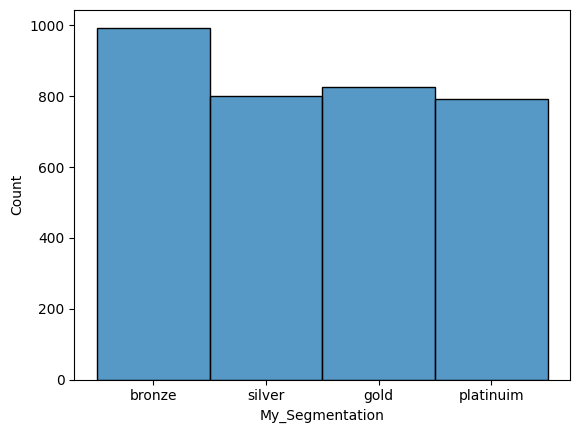

In [86]:
sns.histplot(rfm_table['My_Segmentation'])

In [87]:
px.histogram(rfm_table['My_Segmentation'])

In [89]:
def customer_segmentation(RFM_Score):
  if RFM_Score ==444:
    return 'VIP customer'
  elif RFM_Score >= 443 and RFM_Score < 444:
    return 'Loyal customer'
  elif RFM_Score >=421 and RFM_Score < 443:
    return 'become a loyal customer'
  elif RFM_Score >=344 and RFM_Score < 421:
    return 'recent customer'
  elif RFM_Score >=323 and RFM_Score < 344:
    return 'potential customer'
  elif RFM_Score >=224 and RFM_Score<311:
    return 'high risk to churn'
  else:
    return 'loosing customer'

rfm_table['customer_segmentation'] = rfm_table['RFM_Score'].apply(customer_segmentation)
rfm_table

,recency,frequncy,Monetary,R_Score,F_Score,M_Score,RFM_Score,My_Segmentation,customer_segmentation
customer_id,,,,,,,,,
1,7,11,3018.09,4,4,3,443,platinuim,Loyal customer
2,128,3,2226.26,1,1,2,112,bronze,loosing customer
3,102,8,3362.81,1,4,3,143,bronze,loosing customer
4,195,2,220.57,1,1,1,111,bronze,loosing customer
5,16,6,2394.94,4,2,2,422,platinuim,become a loyal customer
...,...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,bronze,loosing customer
3497,52,3,1648.32,2,1,1,211,bronze,loosing customer
3498,127,6,3147.33,1,2,3,123,bronze,loosing customer


In [90]:
rfm_table.to_csv("rfm_table_data.csv")